C:\Users\Dhoha\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Dhoha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dhoha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dhoha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dhoha\an

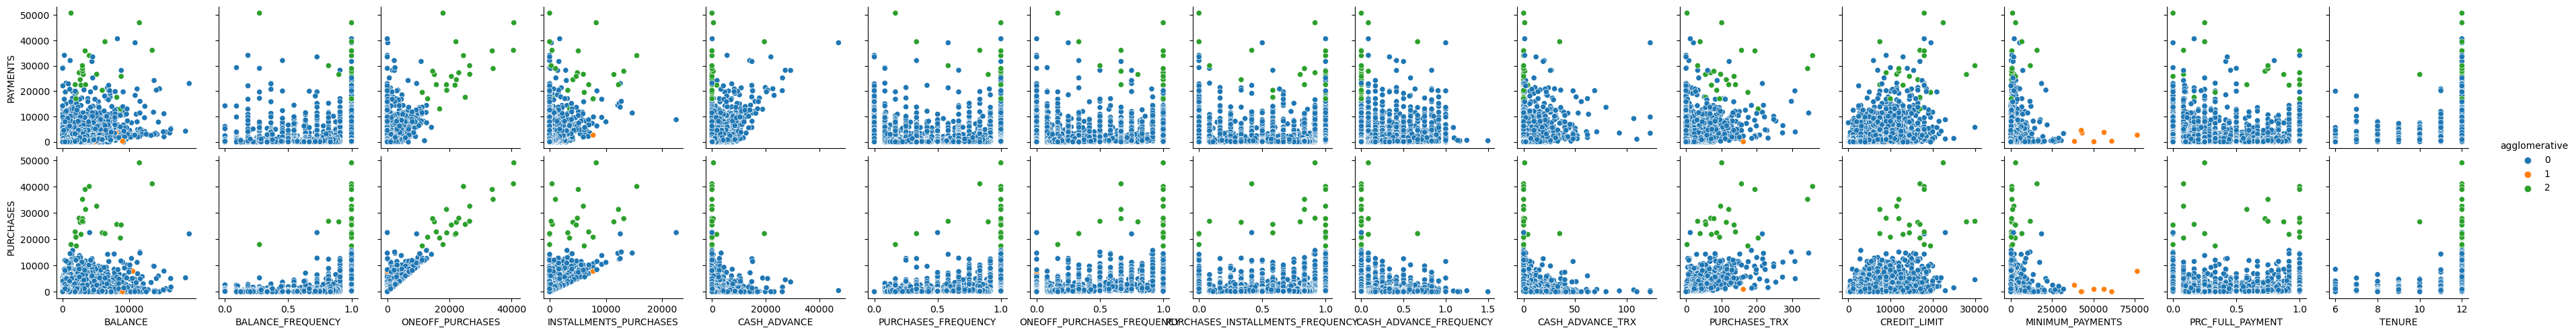

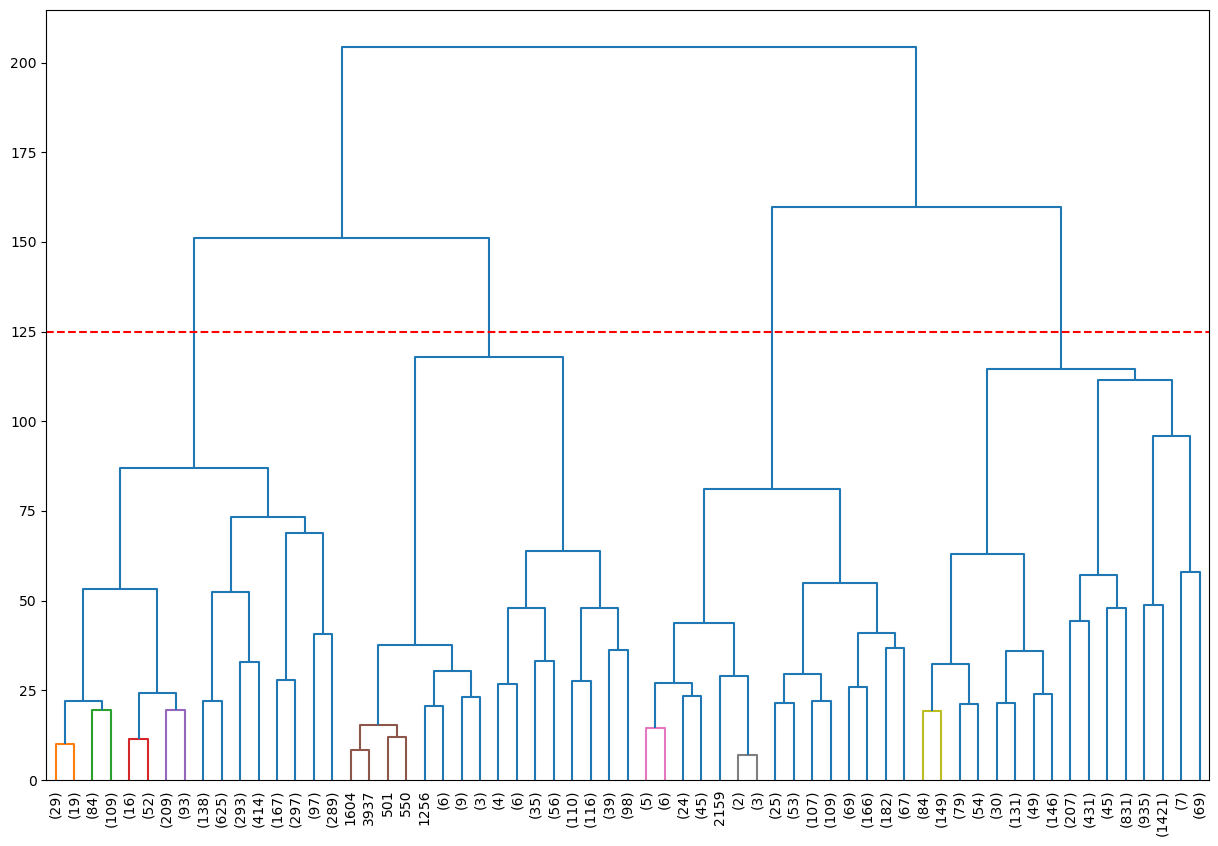

C:\Users\Dhoha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dhoha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dhoha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dhoha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

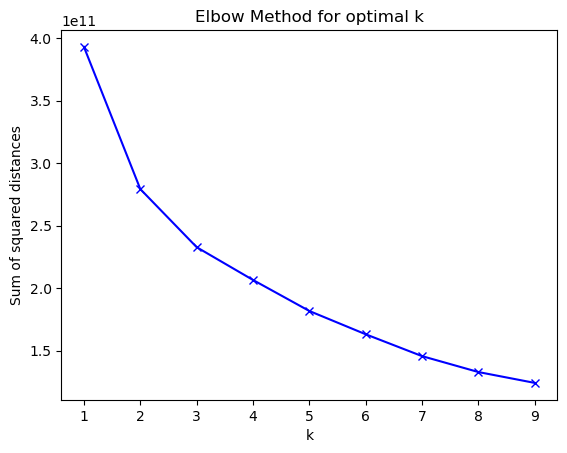

C:\Users\Dhoha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dhoha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dhoha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dhoha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if 

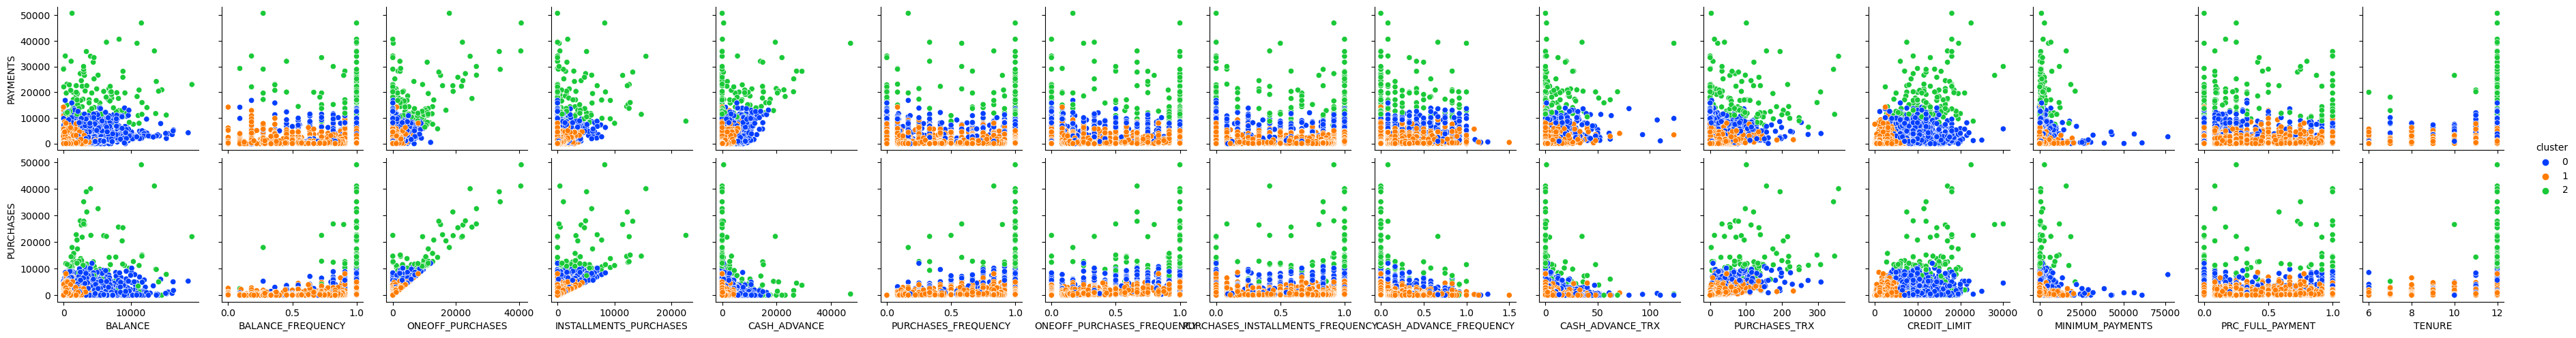

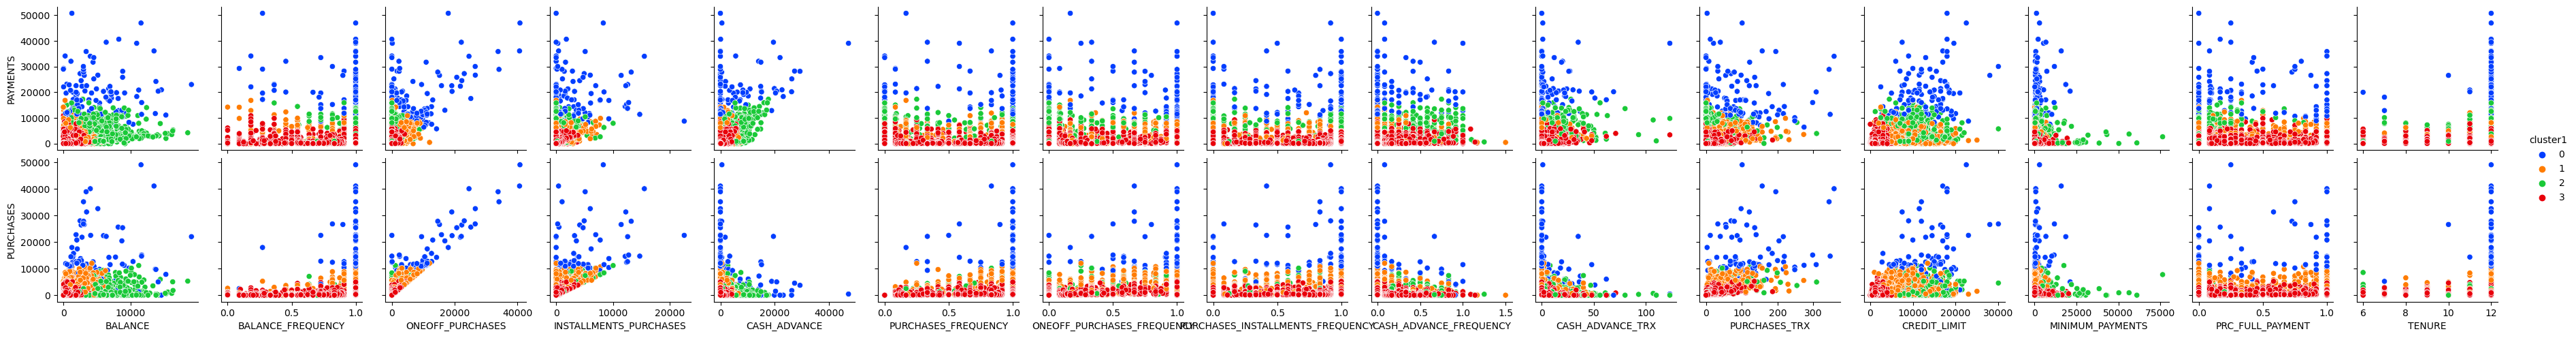

In [11]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering, KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.cluster.hierarchy import dendrogram, linkage
data = pd.read_csv('CC GENERAL.csv')
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(), inplace=True)
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)
data.drop('CUST_ID', axis=1, inplace=True)

model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
clust_labels = model.fit_predict(data)

agglomerative = pd.DataFrame(clust_labels)
data['agglomerative'] = agglomerative[0]

df = data.drop(['PAYMENTS', 'PURCHASES', 'agglomerative'], axis=1)
best_cols = df.columns

sns.pairplot(data=data, x_vars=best_cols, y_vars=['PAYMENTS', 'PURCHASES'], palette="tab10", hue="agglomerative")

data_scaled = data.drop(['agglomerative'], axis=1).apply(zscore)

plt.figure(figsize=(15, 10))
dendrogram(linkage(data_scaled, method="ward"), leaf_rotation=90, p=5, color_threshold=20, leaf_font_size=10,
           truncate_mode='level')
plt.axhline(y=125, color='r', linestyle='--')
plt.show()

Sum_of_squared_distances = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for optimal k')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data.drop(['agglomerative'], axis=1))
labels = pd.DataFrame(kmeans.labels_)
data['cluster'] = labels[0]

df = data.drop(['PAYMENTS', 'PURCHASES', 'agglomerative', 'cluster'], axis=1)
best_cols = df.columns

sns.pairplot(data=data, x_vars=best_cols, y_vars=['PAYMENTS', 'PURCHASES'], palette="bright", hue="cluster")

# Repeat the process for another number of clusters (4)
kmeans1 = KMeans(n_clusters=4, random_state=0)
kmeans1.fit(data.drop(['agglomerative'], axis=1))
labels1 = pd.DataFrame(kmeans1.labels_)
data['cluster1'] = labels1[0]

# Visualization with seaborn
df = data.drop(['PAYMENTS', 'PURCHASES', 'agglomerative', 'cluster', 'cluster1'], axis=1)
best_cols = df.columns

sns.pairplot(data=data, x_vars=best_cols, y_vars=['PAYMENTS', 'PURCHASES'], palette="bright", hue="cluster1")

plt.show()
